# 1. Instalacije i importanje

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mslvm\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mslvm\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mslvm\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install missingno

In [6]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mslvm\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# 2. Izvlačenje podataka iz dataseta u kojem se nalaze podaci o potrošnji i uporabi energije po državama kroz godine

In [8]:
wec = pd.read_csv("world_energy_consumption.csv")

In [9]:
# Iz dataseta uzmemo stupce koji označavaju pojedine izvore iz kojih se dobije elektročna energija
izvori = ['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']

# Sortiramo po godini i državi, pa od pojedinih izvora izvučemo omjer tog izvora u odnosu na ukupnu proizvodnju električne energije u postotcima
izvoriPoDrzaviIGodini = wec[['year','country']]
wec['ukupno'] = wec[izvori].sum(axis=1)
for i in izvori:
    izvoriPoDrzaviIGodini[f"{i}%"] = (wec[i]/wec['ukupno']) * 100

# Uzmemo samo godine ovog tisućljeća
izvoriPoDrzaviIGodini = izvoriPoDrzaviIGodini[izvoriPoDrzaviIGodini['year']>=2000]

C:\Users\mslvm\AppData\Local\Temp\ipykernel_8100\3361674602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  izvoriPoDrzaviIGodini[f"{i}%"] = (wec[i]/wec['ukupno']) * 100
C:\Users\mslvm\AppData\Local\Temp\ipykernel_8100\3361674602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  izvoriPoDrzaviIGodini[f"{i}%"] = (wec[i]/wec['ukupno']) * 100
C:\Users\mslvm\AppData\Local\Temp\ipykernel_8100\3361674602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

# 3. Tipova izvora električne energije u Hrvatskoj i Europi

C:\Users\mslvm\AppData\Local\Temp\ipykernel_8100\3914841270.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hrvatska = izvoriPoDrzaviIGodini[izvoriPoDrzaviIGodini['country']=='Croatia'].groupby('year').mean()
C:\Users\mslvm\AppData\Local\Temp\ipykernel_8100\3914841270.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  europa = izvoriPoDrzaviIGodini.loc[izvoriPoDrzaviIGodini['country']


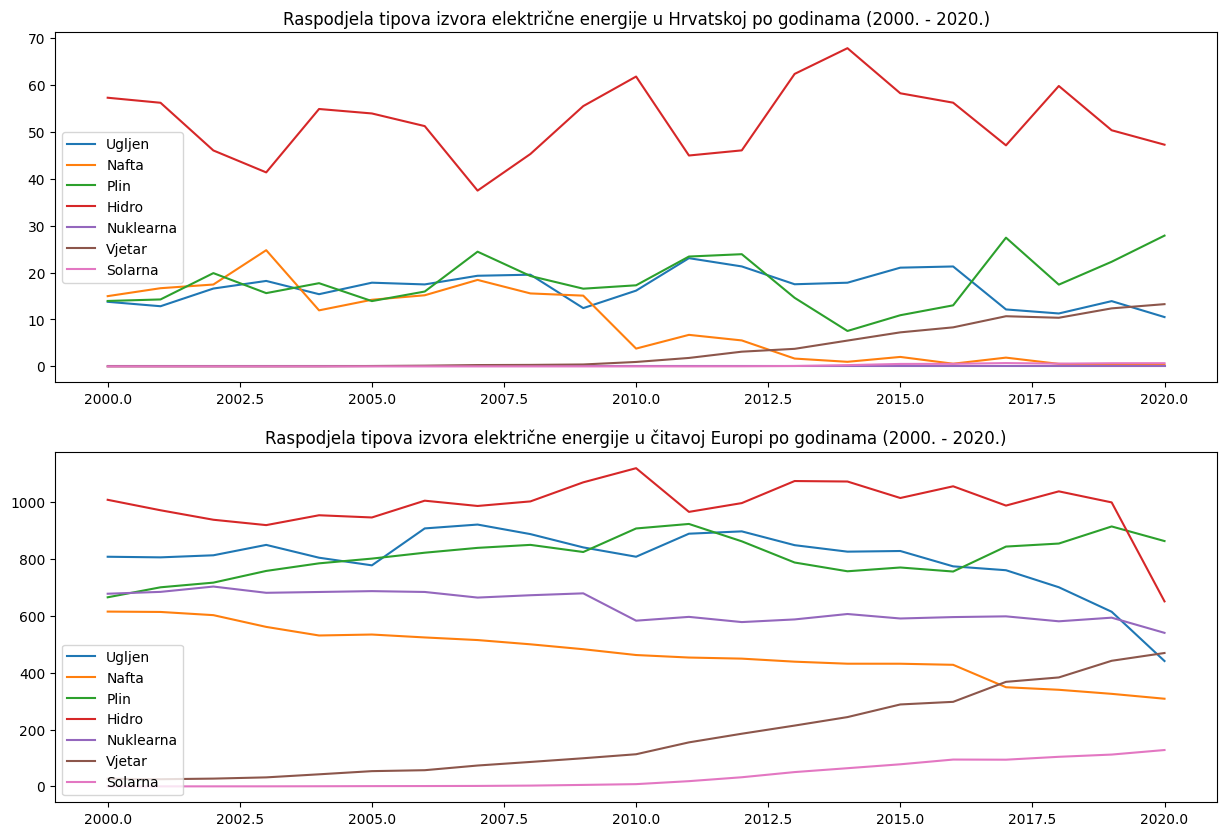

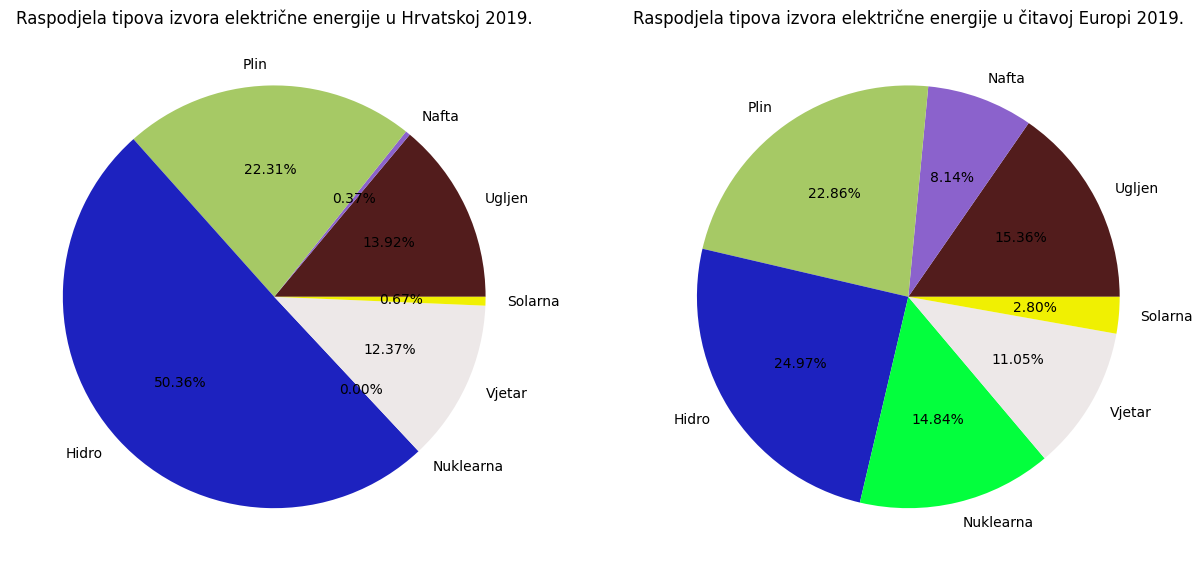

In [28]:
# Izdvojimo podatke za Hrvatsku
hrvatska = izvoriPoDrzaviIGodini[izvoriPoDrzaviIGodini['country']=='Croatia'].groupby('year').mean()

# Za Europu koristimo dataset 'Countries-Continents.csv' koji sadrži parove kontinent-država za sve države svijeta
# Zbrojimo ukupnu potrošnju svih europskih država
kontinenti = pd.read_csv('Countries-Continents.csv')
europa = izvoriPoDrzaviIGodini.loc[izvoriPoDrzaviIGodini['country']
    .isin(kontinenti[kontinenti['Continent'] == 'Europe']['Country'])].groupby('year').sum()


# Nazivi za pojedine grafove i boje koje se koriste u grafovima
naziviGrafova = {'Ugljen':'coal_electricity', 'Nafta': 'oil_electricity', 'Plin' : 'gas_electricity','Hidro' : 'hydro_electricity',
    'Nuklearna' : 'nuclear_electricity','Vjetar' : 'wind_electricity','Solarna' : 'solar_electricity'}
bojeTipovaEnergije = ['#521c1c','#8b62cc','#a6c965','#1d22bf','#03ff3d','#ede8e8','#f0f002']

# Pomoć pri crtanju grafova
drzave = [hrvatska, europa]
imeDržaveZaNaslovGrafa = ['Hrvatskoj', 'čitavoj Europi']


# Linijski grafovi koji prikazuju tipove izvora električne energije za Hrvatsku i Europu kroz godine
fig, ax = plt.subplots(2, figsize=(15, 10))
br = 0
for drzava in drzave:
    ax[br].plot(drzava, label = naziviGrafova)
    ax[br].set_title(f"Raspodjela tipova izvora električne energije u {imeDržaveZaNaslovGrafa[br]} po godinama (2000. - 2020.)")
    ax[br].legend()
    br = br+1

# Pie chartovi koji prikazuju raspodjelu tipova izvora električne energije u Hrvatskoj i Europi 2019. godine
fig, ax =  plt.subplots(1, 2, figsize=(15, 10))
br = 0
for drzava in drzave:
    pieChart=drzava[(drzava.index.values == 2019)]
    ax[br].pie(pieChart.iloc[0].values, colors=bojeTipovaEnergije, labels=naziviGrafova, autopct='%1.2f%%')
    ax[br].set_title(f"Raspodjela tipova izvora električne energije u {imeDržaveZaNaslovGrafa[br]} 2019.")
    br = br+1

plt.show()

# 4. Potrošnja energije iz obnovljivih izvora u Hrvatskoj i svijetu

In [41]:
# Označavanje izvora energije koji su obnovljivi i dohvaćanje podataka o njihovoj potrošnji
potrosnja = ["iso_code","country", "year", "renewables_consumption","other_renewable_consumption","hydro_consumption","solar_consumption","wind_consumption", "population"]
potrosnja_obnovljivi = ["hydro_consumption","solar_consumption","wind_consumption","other_renewable_consumption"]
potrosnja_df = wec[potrosnja]
# Potrebno je promijeniti ime stupca 'iso_code' u 'iso_a3' zbog kasnijeg korištenja shapefile datoteke za prikaz karte svijeta
potrosnja_df.rename({"iso_code":"iso_a3"}, axis=1, inplace=True)

#Uzmemo podatke iz razdoblja 2000. - 2019.
godine = potrosnja_df["year"].isin(range(2000,2019))
potrosnja_df = potrosnja_df[godine]
bar = potrosnja_df.groupby('year')[potrosnja_obnovljivi].sum()
bar.reset_index(level=0, inplace=True)

C:\Users\mslvm\AppData\Local\Temp\ipykernel_8100\56453900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potrosnja_df.rename({"iso_code":"iso_a3"}, axis=1, inplace=True)


<AxesSubplot: title={'center': 'Potrošnje energije iz obnovljivih izvora u Svijetu'}, xlabel='Godina', ylabel='TWh'>

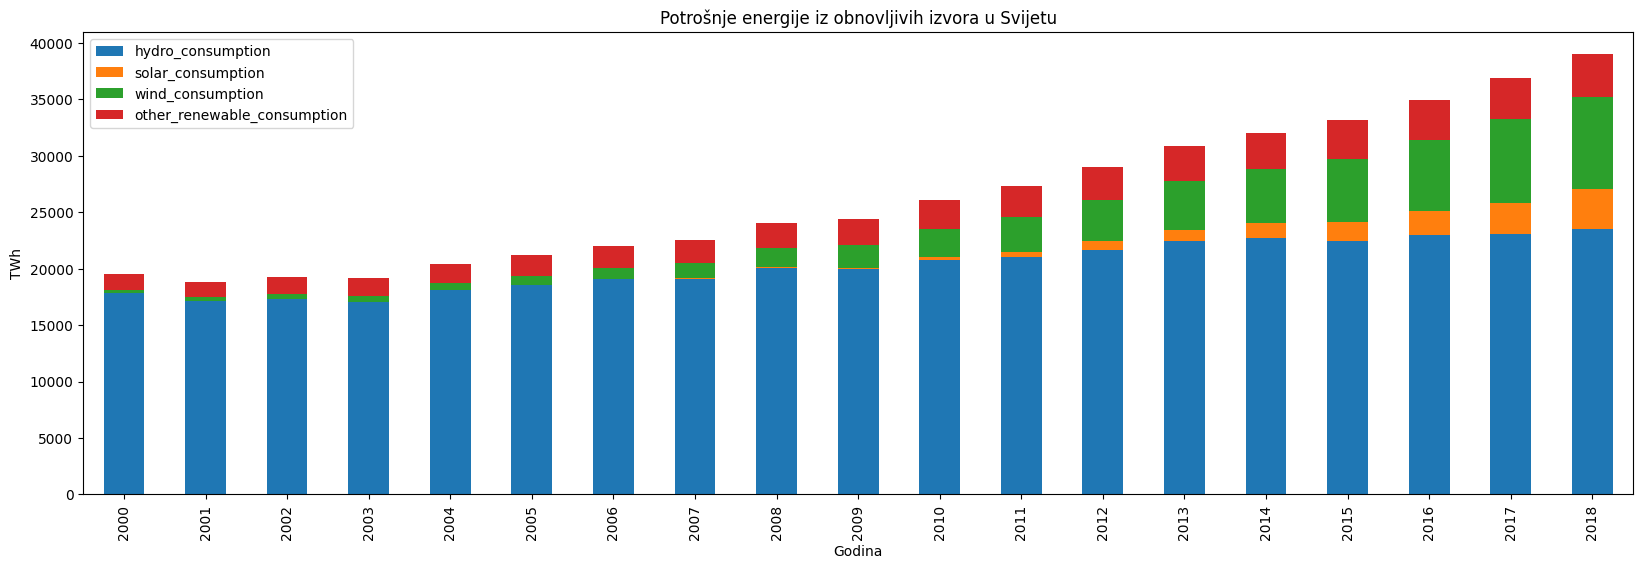

In [42]:
# Barplot koji prikazuje potrošnju energije iz obnovljivih izvora u ovom tisućljeću za cijeli svijet
bar.plot(x='year', xlabel='Godina', ylabel='TWh', kind='bar', stacked=True, figsize=(20,6),
        title='Potrošnje energije iz obnovljivih izvora u Svijetu')

<AxesSubplot: title={'center': 'Potrošnje energije iz obnovljivih izvora u Hrvatskoj'}, xlabel='Godina', ylabel='TWh'>

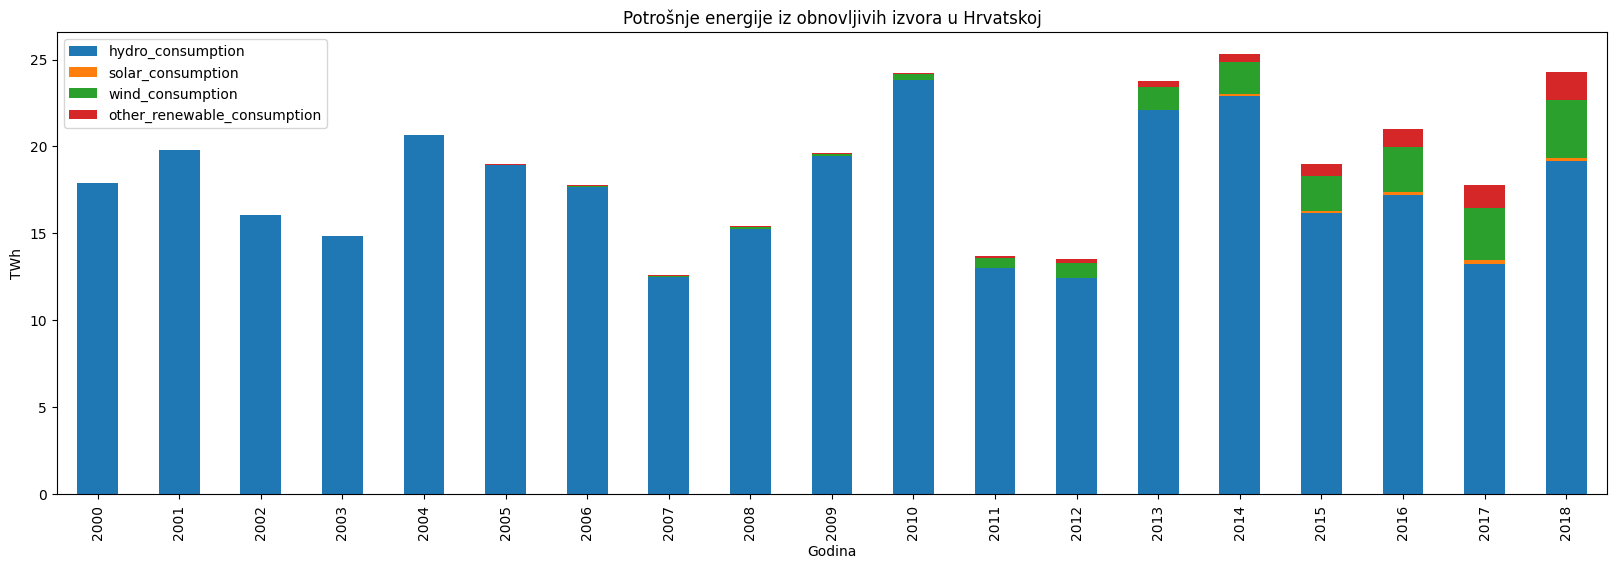

In [43]:
# Barplot koji prikazuje potrošnju energije iz obnovljivih izvora u ovom tisućljeću samo za Hrvatsku
bar2 = potrosnja_df[potrosnja_df['country']=='Croatia'].groupby('year')[potrosnja_obnovljivi].sum()
bar2.reset_index(level=0, inplace=True)

bar2.plot(x='year', xlabel='Godina', ylabel='TWh', kind='bar', stacked=True, figsize=(20,6),
        title='Potrošnje energije iz obnovljivih izvora u Hrvatskoj')

In [14]:
# Iz grafova se vidi se da u Hrvatskoj i u svijetu raste potrošnja energije dobivene od sunca, vjetra, i drugih obnovljivih izvora energije.

# 5. Potrošnja energije iz obnovljivih izvora po državama

In [32]:
# Učitavanje shapefile datoteke koja sadrži kartu svijeta
drzave = gpd.read_file("./svijet/all_countries.shp")
karta = drzave[["iso_a3","geometry"]]

# Merge shapefilea sa podacima o potrošnji energije
kartaPotrosnjeEnergije = potrosnja_df.merge(karta, on='iso_a3')
obnovljivi_gdf = gpd.GeoDataFrame(
    kartaPotrosnjeEnergije, geometry=kartaPotrosnjeEnergije["geometry"])

<AxesSubplot: title={'center': 'Potrošnja energije iz obnovljivih izvora po državama u TWh'}>

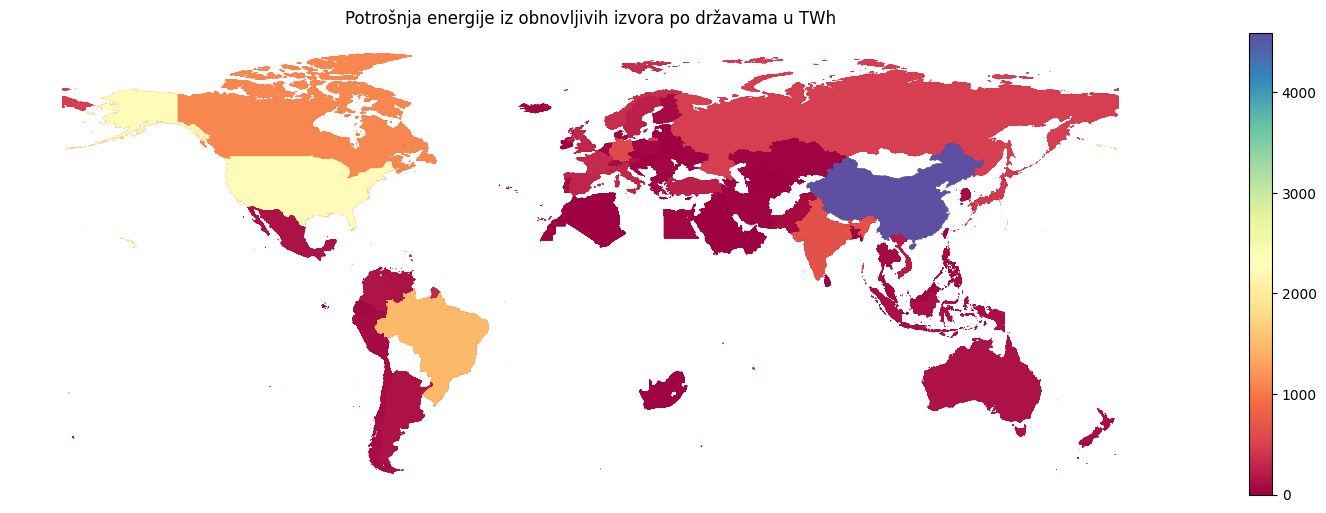

In [16]:
# Izrada grafa na karti svijeta
fig, ax = plt.subplots(1, figsize=(20, 6))
ax.axis('off')
ax.set_title('Potrošnja energije iz obnovljivih izvora po državama u TWh')

obnovljivi_gdf.plot(column='renewables_consumption', cmap="Spectral", ax=ax, legend=True)

# 6. Potrošnja energije iz obnovljivih izvora po europskim državama

In [34]:
# Označavanje izvora energije koji su obnovljivi i dohvaćanje podataka o njihovoj potrošnji
potrosnja = ["country", "year", "other_renewable_consumption","hydro_consumption","solar_consumption","wind_consumption"]
potrosnja_obnovljivi = ["hydro_consumption","solar_consumption","wind_consumption","other_renewable_consumption"]
potrosnja_df = wec[potrosnja]

# Dohvaćanje podataka o europskim državama u razdoblju od 2000. do 2019.
europa = kontinenti[kontinenti['Continent'] == 'Europe']['Country']
godine = potrosnja_df["year"].isin(range(2000,2019))
potrosnja_df = potrosnja_df.loc[potrosnja_df['country'].isin(europa)]
potrosnja_df = potrosnja_df[godine]

# Izbacivanje država kojima su sve vrijednosti jednake nuli
potrosnja_df=potrosnja_df[potrosnja_df!=0].dropna()

# Zbrajanje potrošnje svih energija obnovljivih izvora
potrosnja_df['ukupno'] = 0
for izvor in potrosnja_obnovljivi:
    potrosnja_df['ukupno'] = potrosnja_df['ukupno'] + potrosnja_df[izvor]

C:\Users\mslvm\AppData\Local\Temp\ipykernel_8100\512668310.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  potrosnja_df = potrosnja_df[godine]


Text(220.72222222222223, 0.5, 'Država')

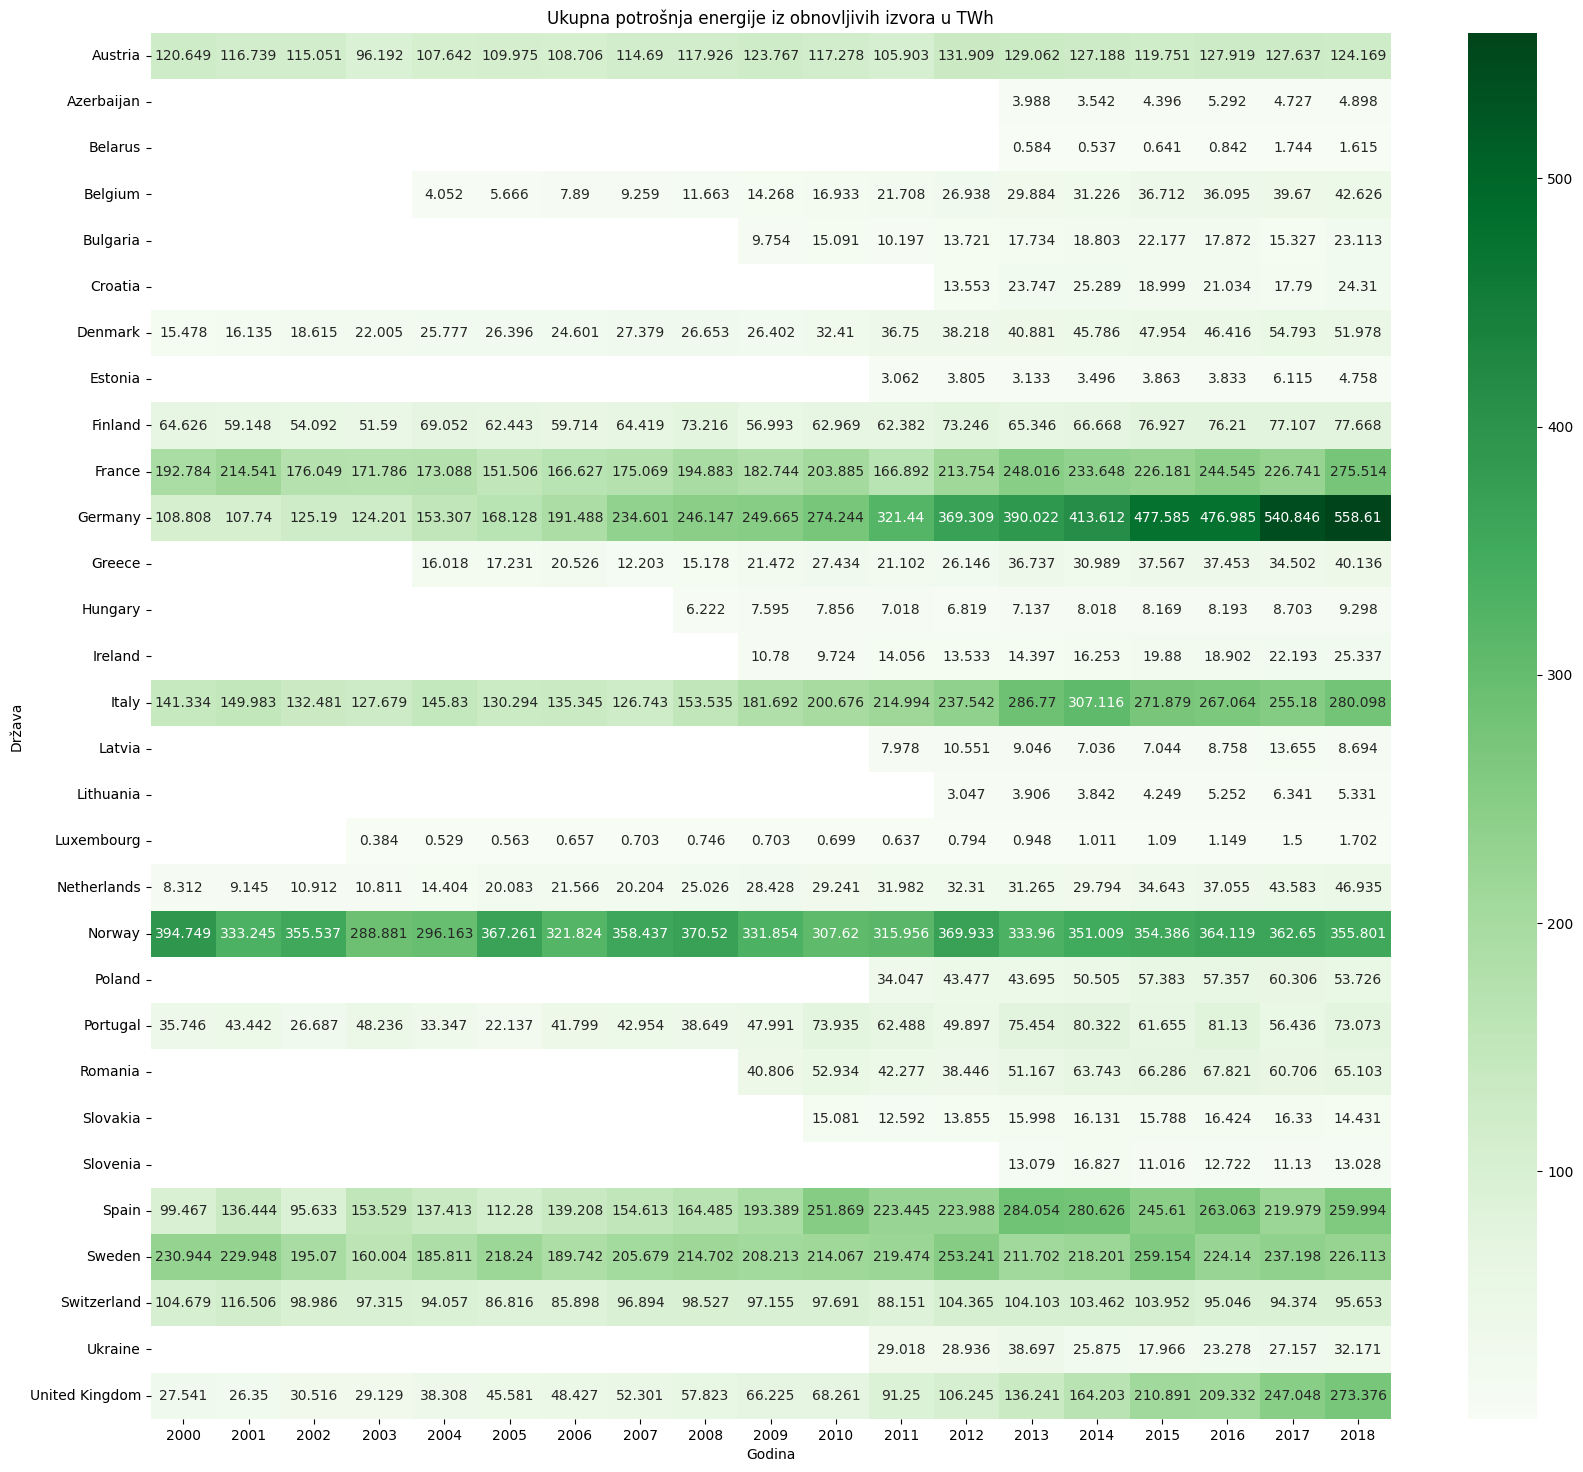

In [35]:
# Izrada heatmape koja prikazuje odnos države, godine, i zbroja potrošnje svih energija obnovljivih izvora
plt.figure(figsize=(20, 18))

graf = sns.heatmap(pd.crosstab(potrosnja_df['country'], potrosnja_df['year'], values=potrosnja_df['ukupno'], 
    aggfunc='sum'), annot=True, cmap = 'Greens', fmt='g')
    
plt.title('Ukupna potrošnja energije iz obnovljivih izvora u TWh')
plt.xlabel("Godina")
plt.ylabel("Država")